In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

In [2]:
np.random.seed(42)

mu_true = np.array([25,60])
sigma_true = np.array([[4,8],[8,25]])

n = 100

data = np.random.multivariate_normal(mu_true, sigma_true, size = n)

In [7]:
def log_posterior(mu, log_a, b, log_c):
    try:
        rv = multivariate_normal(mean = mu, cov = sigma)
        log_likelihood = np.sum(rv.logpdf(data))
    except:
        return -np.inf

    a = np.exp(log_a)
    c = np.exp(log_c)

    L = np.array([[a,0],[b,c]])

    sigma = L @ L.T

    log_prior_mu = np.sum(norm.logpdf(mu,loc = 0, scale = 10))
    log_prior = norm.logpdf(log_a,0,1) + norm.logpdf(b,0,1) + norm.logpdf(log_c,0,1)

    return log_likelihood + log_prior_mu + log_prior

In [4]:
# Metropolis - Hastings Algorithm

n_iter = 10000

samples = np.zeros((n_iter, 5))

mu_current = np.array([0,0])
log_a_current = 0
b_current = 0
log_c_current = 0

proposal_sd = np.array([0.5,0.5,0.1,0.3,0.1])

for i in range(n_iter):
    mu_proposed = mu_current + np.random.normal(0,proposal_sd[:2])
    log_a_proposed = log_a_current + np.random.normal(0,proposal_sd[2])
    b_proposed = b_current + np.random.normal(0,proposal_sd[3])
    log_c_proposed = log_c_current + np.random.normal(0,proposal_sd[4])

    log_r = log_posterior(mu_proposed,log_a_proposed,b_proposed,log_c_proposed) - log_posterior(mu_current,log_a_current,b_current,log_c_current)

    if np.log(np.random.rand()) < log_r:
        mu_current = mu_proposed
        log_a_current = log_a_proposed
        b_current = b_proposed
        log_c_current = log_c_proposed

    samples[i,0:2] = mu_current
    samples[i,2] = log_a_current
    samples[i,3] = b_current
    samples[i,4] = log_c_current



In [5]:
mu_samples = samples[:, 0:2]
log_a_samples = samples[:, 2]
b_samples = samples[:, 3]
log_c_samples = samples[:, 4]

a_samples = np.exp(log_a_samples)
c_samples = np.exp(log_c_samples)


Sigma_samples = np.array([
    [[a**2 + b**2, b * c],
     [b * c,       c**2]]
    for a, b, c in zip(a_samples, b_samples, c_samples)
])

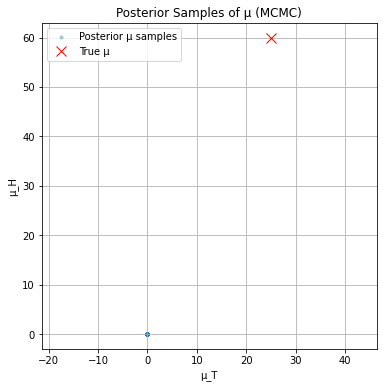

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(mu_samples[:, 0], mu_samples[:, 1], alpha=0.3, s=10, label="Posterior μ samples")
plt.plot(mu_true[0], mu_true[1], 'rx', label="True μ", markersize=10)
plt.xlabel("μ_T")
plt.ylabel("μ_H")
plt.title("Posterior Samples of μ (MCMC)")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()